In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
!kaggle datasets download -d sahirmaharajj/alcoholic-beverage-violations
!unzip alcoholic-beverage-violations.zip

Dataset URL: https://www.kaggle.com/datasets/sahirmaharajj/alcoholic-beverage-violations
License(s): apache-2.0
  0% 0.00/12.0k [00:00<?, ?B/s]
100% 12.0k/12.0k [00:00<00:00, 32.4MB/s]
Archive:  alcoholic-beverage-violations.zip
  inflating: Public_Schools_20240831.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('Public_Schools_20240831.csv')
print(df.columns)

Index(['CATEGORY', 'SCHOOL NAME', 'ADDRESS', 'CITY', 'ZIP CODE', 'PHONE',
       'URL', 'LONGITUDE', 'LATITUDE', 'LOCATION'],
      dtype='object')


In [ ]:
from pycaret.classification import *
s = setup(df, target='CATEGORY', session_id=123)

,Description,Value
0,Session id,123
1,Target,CATEGORY
2,Target type,Multiclass
3,Target mapping,"ELEMENTARY SCHOOLS: 0, HIGH SCHOOLS: 1, MIDDLE SCHOOLS: 2"
4,Original data shape,"(200, 10)"
5,Transformed data shape,"(200, 27)"
6,Transformed train set shape,"(140, 27)"
7,Transformed test set shape,"(60, 27)"
8,Numeric features,3
9,Categorical features,6


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6786,0.0000,0.6786,0.4617,0.5492,0.0000,0.0000,0.4130
knn,K Neighbors Classifier,0.6786,0.5022,0.6786,0.4649,0.5515,0.0079,0.0117,0.1720
xgboost,Extreme Gradient Boosting,0.6786,0.5387,0.6786,0.4617,0.5492,0.0000,0.0000,0.1490
dummy,Dummy Classifier,0.6786,0.5000,0.6786,0.4617,0.5492,0.0000,0.0000,0.1760
ridge,Ridge Classifier,0.6571,0.0000,0.6571,0.4593,0.5404,-0.0167,-0.0200,0.1160
nb,Naive Bayes,0.6429,0.4949,0.6429,0.4637,0.5379,-0.0155,-0.0189,0.1080
svm,SVM - Linear Kernel,0.5571,0.0000,0.5571,0.3622,0.4346,0.0000,0.0000,0.1160
qda,Quadratic Discriminant Analysis,0.4786,0.0000,0.4786,0.3593,0.3661,0.0043,0.0136,0.1060
et,Extra Trees Classifier,0.2286,0.4320,0.2286,0.3448,0.1895,0.0097,0.0303,0.2170
dt,Decision Tree Classifier,0.1286,0.5000,0.1286,0.0173,0.0305,0.0000,0.0000,0.1070


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

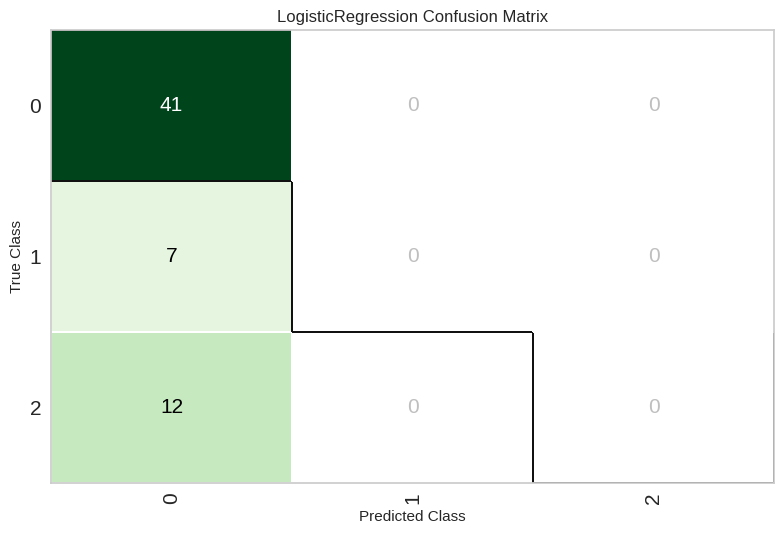

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

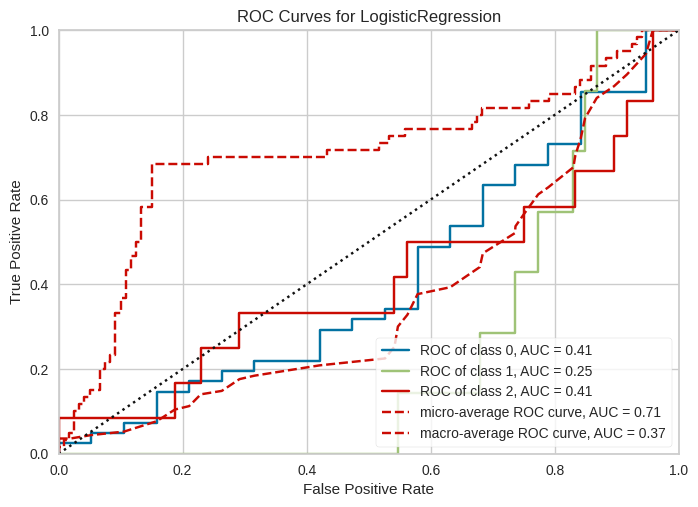

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

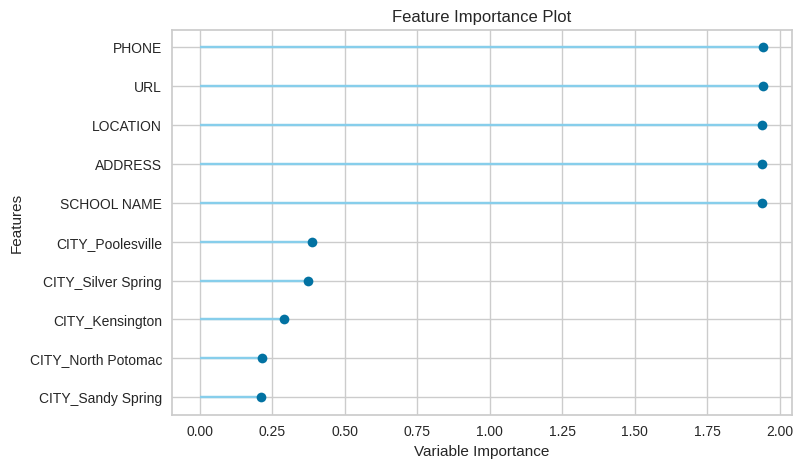

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6833,0,0.6833,0.4669,0.5548,0.0000,0.0000


In [ ]:
# show predictions df
holdout_pred.head()

,SCHOOL NAME,ADDRESS,CITY,ZIP CODE,PHONE,URL,LONGITUDE,LATITUDE,LOCATION,CATEGORY,prediction_label,prediction_score
102,Woodfield ES,24200 Woodfield Rd,Gaithersburg,20879,301-253-7085,http://www.montgomeryschoolsmd.org/schools/woo...,-77.198280,39.252781,"24200 Woodfield Rd\nGaithersburg, MD 20879\n(3...",ELEMENTARY SCHOOLS,ELEMENTARY SCHOOLS,0.7376
162,James Hubert Blake HS,300 Norwood Rd,Silver Spring,20905,301-879-1300,http://www.montgomeryschoolsmd.org/schools/bla...,-77.017509,39.113331,"300 Norwood Rd\nSilver Spring, MD 20905\n(39.1...",HIGH SCHOOLS,ELEMENTARY SCHOOLS,0.8202
70,Belmont ES,19528 Olney Mill Rd,Olney,20832,301-924-3140,http://www.montgomeryschoolsmd.org/schools/bel...,-77.066803,39.178581,"19528 Olney Mill Rd\nOlney, MD 20832\n(39.1785...",ELEMENTARY SCHOOLS,ELEMENTARY SCHOOLS,0.7396
123,Poolesville ES,19565 Fisher Ave,Poolesville,20837,301-972-7960,http://www.montgomeryschoolsmd.org/schools/poo...,-77.407410,39.144032,"19565 Fisher Ave\nPoolesville, MD 20837\n(39.1...",ELEMENTARY SCHOOLS,ELEMENTARY SCHOOLS,0.5335
194,Garrett Park ES (at Grosvenor Center),5701 Grosvenor La,Bethesda,20814,301-929-2170,http://www.montgomeryschoolsmd.org/schools/gar...,-77.114128,39.023533,"5701 Grosvenor La\nBethesda, MD 20814\n(39.023...",ELEMENTARY SCHOOLS,ELEMENTARY SCHOOLS,0.6519


In [ ]:
# copy data and drop Category variable

new_data = df.copy()
new_data.drop('CATEGORY', axis=1, inplace=True)
new_data.head()

,SCHOOL NAME,ADDRESS,CITY,ZIP CODE,PHONE,URL,LONGITUDE,LATITUDE,LOCATION
0,Damascus HS,25921 Ridge Rd,Damascus,20872,301-253-7030,http://www.montgomeryschoolsmd.org/schools/dam...,-77.210020,39.282496,"25921 Ridge Rd\nDamascus, MD 20872\n(39.282495..."
1,Clearspring ES,9930 Moyer Rd,Damascus,20872,301-253-7004,http://www.montgomeryschoolsmd.org/schools/cle...,-77.207301,39.265783,"9930 Moyer Rd\nDamascus, MD 20872\n(39.2657831..."
2,Sherwood ES,1401 Olney Sandy Spring Rd,Sandy Spring,20860,301-924-3195,http://www.montgomeryschoolsmd.org/schools/she...,-77.033116,39.149584,"1401 Olney Sandy Spring Rd\nSandy Spring, MD 2..."
3,Pine Crest ES,201 Woodmoor Dr,Silver Spring,20901,301-649-8066,http://www.montgomeryschoolsmd.org/schools/pin...,-77.005038,39.021311,"201 Woodmoor Dr\nSilver Spring, MD 20901\n(39...."
4,Earle B. Wood MS,14615 Bauer Dr,Rockville,20852,301-460-2150,http://www.montgomeryschoolsmd.org/schools/woodms,-77.107529,39.093295,"14615 Bauer Dr\nRockville, MD 20852\n(39.09329..."


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,SCHOOL NAME,ADDRESS,CITY,ZIP CODE,PHONE,URL,LONGITUDE,LATITUDE,LOCATION,prediction_label,prediction_score
0,Damascus HS,25921 Ridge Rd,Damascus,20872,301-253-7030,http://www.montgomeryschoolsmd.org/schools/dam...,-77.210022,39.282497,"25921 Ridge Rd\nDamascus, MD 20872\n(39.282495...",ELEMENTARY SCHOOLS,0.4313
1,Clearspring ES,9930 Moyer Rd,Damascus,20872,301-253-7004,http://www.montgomeryschoolsmd.org/schools/cle...,-77.207298,39.265781,"9930 Moyer Rd\nDamascus, MD 20872\n(39.2657831...",ELEMENTARY SCHOOLS,0.8190
2,Sherwood ES,1401 Olney Sandy Spring Rd,Sandy Spring,20860,301-924-3195,http://www.montgomeryschoolsmd.org/schools/she...,-77.033119,39.149586,"1401 Olney Sandy Spring Rd\nSandy Spring, MD 2...",ELEMENTARY SCHOOLS,0.7941
3,Pine Crest ES,201 Woodmoor Dr,Silver Spring,20901,301-649-8066,http://www.montgomeryschoolsmd.org/schools/pin...,-77.005035,39.021313,"201 Woodmoor Dr\nSilver Spring, MD 20901\n(39....",ELEMENTARY SCHOOLS,0.8207
4,Earle B. Wood MS,14615 Bauer Dr,Rockville,20852,301-460-2150,http://www.montgomeryschoolsmd.org/schools/woodms,-77.107529,39.093296,"14615 Bauer Dr\nRockville, MD 20852\n(39.09329...",MIDDLE SCHOOLS,0.6967


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ZIP CODE', 'LONGITUDE',
                                              'LATITUDE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ZIP CODE', 'LONGITUDE',
                                             'LATITUDE'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fal...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)